In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# loading data
data = pd.read_csv('data/OnlineNewsPopularityClean.csv')

# 80/20 split between training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(data[["n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words", "n_non_stop_unique_tokens", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world", "kw_min_min", "kw_max_min", "kw_avg_min", "kw_min_max", "kw_max_max", "kw_avg_max", "kw_min_avg", "kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess", "weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday", "is_weekend", "LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04", "global_subjectivity", "global_sentiment_polarity", "global_rate_positive_words", "global_rate_negative_words", "rate_positive_words", "rate_negative_words", "avg_positive_polarity", "min_positive_polarity", "max_positive_polarity", "avg_negative_polarity", "min_negative_polarity", "max_negative_polarity", "title_subjectivity", "title_sentiment_polarity", "abs_title_subjectivity", "abs_title_sentiment_polarity"]], 
                                                    data['shares'], test_size=0.2, random_state=112)

# different regression models to test
models = [LinearRegression(n_jobs=-1),
          Ridge(alpha=0.5),
          Lasso(alpha=0.5),
          DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=100, n_jobs=-1),
          GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
          KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
        ]

model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-NN']

In [6]:
# evaluating each model
model_mse = []
model_mae = []
model_r2 = []
for i in range(len(models)):
    print(f"running {model_names[i]}")
    models[i].fit(X_train, Y_train)
    Y_pred = models[i].predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    model_mse.append(mse)
    model_mae.append(mae)
    model_r2.append(r2)

running Linear Regression
running Ridge
running Lasso
running Decision Tree
running Random Forest
running Gradient Boosting
running K-NN


In [5]:
tr_features = pd.read_csv('data/train_features.csv')
tr_labels = pd.read_csv('data/train_labels.csv')

te_features = pd.read_csv('data/test_features.csv')
te_labels = pd.read_csv('data/test_labels.csv')

def print_results(results):
    print(f'BEST PARAMS: {results.best_params_}\n')

    means = sorted(results.cv_results_['mean_test_score'], reverse=True)
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean,3)} (+/- {round(std * 2, 3)}) for {params}')

In [7]:
def print_results(results):
    print(f'BEST PARAMS: {results.best_params_}\n')

    means = sorted(results.cv_results_['mean_test_score'], reverse=True)
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean,3)} (+/- {round(std * 2, 3)}) for {params}')

tr_features = pd.read_csv('data/train_features.csv')
tr_labels = pd.read_csv('data/train_labels.csv')

te_features = pd.read_csv('data/test_features.csv')
te_labels = pd.read_csv('data/test_labels.csv')

dtparams = {
    'fit_intercept': [False, True],
    'positive': [False, True]
}
cv = GridSearchCV(models[0], dtparams, cv=5, n_jobs=32)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'fit_intercept': False, 'positive': True}

0.12 (+/- 76.617) for {'fit_intercept': False, 'positive': False}
0.12 (+/- 0.017) for {'fit_intercept': False, 'positive': True}
-19.0 (+/- 76.573) for {'fit_intercept': True, 'positive': False}
-19.011 (+/- 0.017) for {'fit_intercept': True, 'positive': True}


In [10]:
dtparams = {
    'alpha': [0.5, 1],
    'fit_intercept': [False, True],
    'positive': [False, True],
    'max_iter': [1000, 5000, 15000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}
cv = GridSearchCV(models[1], dtparams, cv=5, n_jobs=6)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'alpha': 1, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'solver': 'sparse_cg'}

0.043 (+/- 26.767) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'solver': 'auto'}
nan (+/- 26.767) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'solver': 'svd'}
nan (+/- 26.767) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'solver': 'cholesky'}
nan (+/- 0.037) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'solver': 'lsqr'}
nan (+/- 0.037) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'solver': 'sparse_cg'}
nan (+/- 0.034) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'solver': 'sag'}
nan (+/- 0.032) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'solver': 'saga'}
nan (+/- nan) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'posi

C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
420 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\

In [11]:
dtparams = {
    'alpha': [0.5, 1],
    'fit_intercept': [False, True],
    'positive': [False, True],
    'max_iter': [1000, 5000, 15000],
    'selection': ['cyclic', 'random']
}
cv = GridSearchCV(models[2], dtparams, cv=5, n_jobs=32)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'selection': 'cyclic'}

0.07 (+/- 0.023) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'selection': 'cyclic'}
0.07 (+/- 0.023) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': False, 'selection': 'random'}
0.07 (+/- 0.025) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': True, 'selection': 'cyclic'}
0.07 (+/- 0.025) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 1000, 'positive': True, 'selection': 'random'}
0.07 (+/- 0.023) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 5000, 'positive': False, 'selection': 'cyclic'}
0.07 (+/- 0.023) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 5000, 'positive': False, 'selection': 'random'}
0.07 (+/- 0.025) for {'alpha': 0.5, 'fit_intercept': False, 'max_iter': 5000, 'positive': True, 'selection': 'cyclic'}
0.07 (+/- 0.025) for {'alpha': 0.5, 'fit_intercept'

In [6]:
dtparams = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
cv = GridSearchCV(models[3], dtparams, cv=5, n_jobs=8)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

NameError: name 'print_results' is not defined

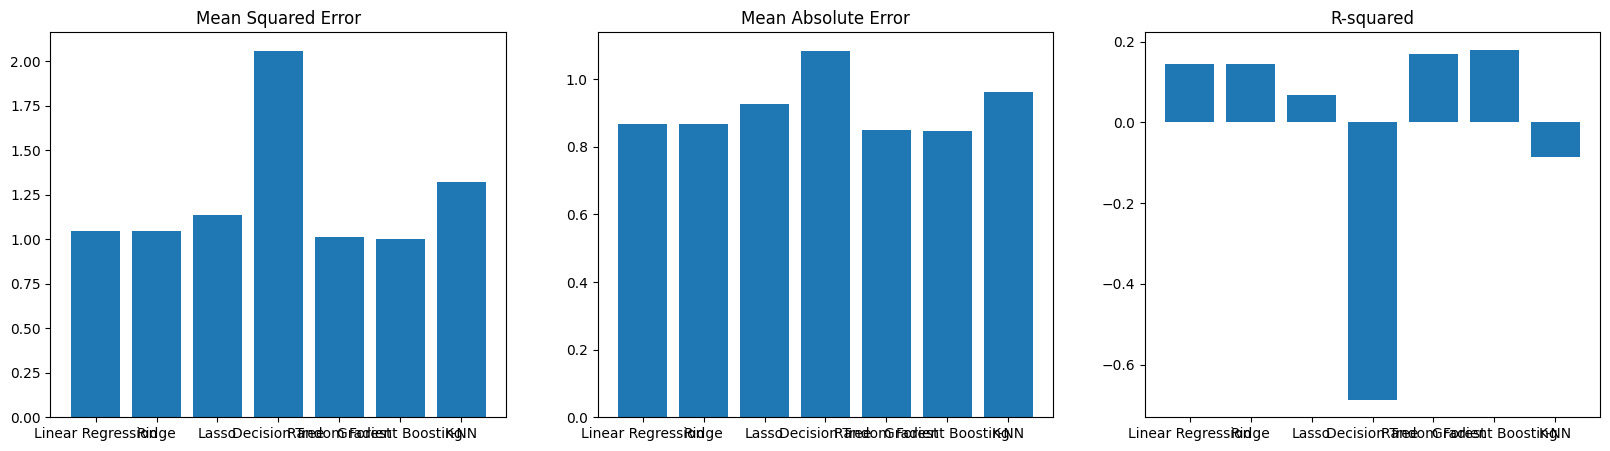

In [4]:
# compare the models using matplotlib
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))
ax[0].bar(model_names, model_mse)
ax[0].set_title('Mean Squared Error')
ax[1].bar(model_names, model_mae)
ax[1].set_title('Mean Absolute Error')
ax[2].bar(model_names, model_r2)
ax[2].set_title('R-squared')
plt.show()
